<a href="https://colab.research.google.com/github/MataiasCost/Alura-Curso/blob/main/Machine%20Learning%3A%20classifica%C3%A7%C3%A3o%20com%20SKLearn/Introdu%C3%A7%C3%A3o_a_Machine_Learning_Classifica%C3%A7%C3%A3o_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamento do banco de dados (acessando e modificando)

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()


,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
#renomeando os nomes das colunas:
maps = {
    "unfinished":"nao_finalizado",
    "expected_hours": "horas_esperadas",
    "price": "preco"
}

dados = dados.rename(columns = maps)

In [ ]:
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
#Para melhor compreensão vamos criar uma coluna nova, chamada 'finalizado' que vai ser o contrario da coluna nao_finalizado
troca = {
      0:1,
      1:0
  }
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head() 

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


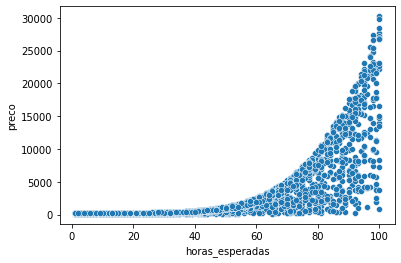

In [ ]:
#visualizar o grafico de dispersão entre as duas features (horas_esperadas X preco)
import seaborn as sns
# sns.scatterplot(dados.horas_esperadas,dados.preco) #método alternativo
sns.scatterplot(x="horas_esperadas",y="preco",data=dados) 

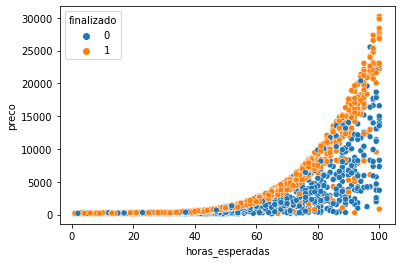

In [ ]:
#Visualizar o mesmo plot, mas agora identificando os pontos onde os eventos foram finalizados
sns.scatterplot(x="horas_esperadas",y="preco",hue = "finalizado",data=dados) 

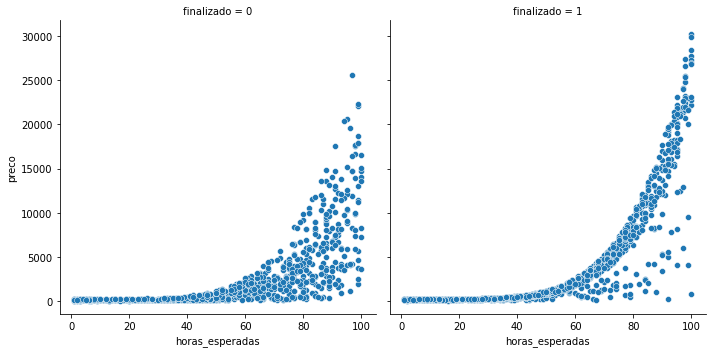

In [ ]:
#introdução a uma visualização nova
sns.relplot(x="horas_esperadas",y="preco",col = "finalizado",data=dados) 

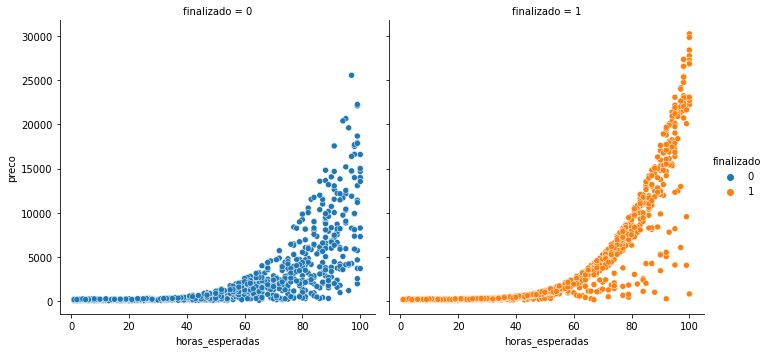

In [ ]:
#mudando a cor dos eventos que passaram
sns.relplot(x="horas_esperadas",y="preco",hue = 'finalizado',col = "finalizado",data=dados) 

In [ ]:
x = dados[['horas_esperadas','preco']]
y = dados['finalizado']

In [ ]:
#modo alternativo ja implementado no sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
# necessário para que o programa peqgue sempre os mesmos dados para treino, caso não seja especificado o "random_state",
# ele vai pegar porções diferentes para teste
SEED = 20

#visando separar proporcionalmente o treino_y e o teste_y
treino_x,teste_x,treino_y,teste_y = train_test_split(x,
                                                     y,
                                                     random_state = SEED,
                                                     test_size = 0.25,
                                                     stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x),len(teste_x)) )

modelo = LinearSVC(random_state = SEED)
modelo.fit(treino_x,treino_y)
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)

print("A acuracia foi de %.2f%%" % (acuracia*100))

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acuracia foi de 47.41%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
#Como saber se nossa previsão foi boa? Vamos criar uma previsão de base, que nada mais é do que um chute que todos os projetos,
#foram finalizados. E testaremos se o nosso ML teve uma acuracia melhor
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y,previsoes_de_base)
print("A acuracia do algoritmo de baseline foi de %.2f%%" % (acuracia*100))


A acuracia do algoritmo de baseline foi de 52.59%


# Conclusão
O nosso algoritmo de ML teve um resultado ruim, ele deve ser melhorado, uma vez que teve um resultado pior que o do baseline (previsões que foram puro chute), vamos tenter ver o que o classificador está fazendo

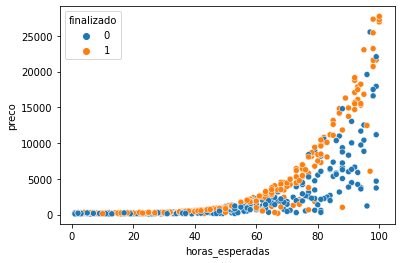

In [ ]:
#visualizando o teste para ver se ele apresenta o mesmo comportamento do treino
sns.scatterplot(x="horas_esperadas",y="preco",hue = teste_y,data=teste_x) 

In [ ]:
#Vamos demarcar no grafico de disperssao a regioes que o ML determinou como sendo finalizado ou não finalizado:
#Acessamos as informações do menor e maior valor dos eixos que compoem o nosos grafico
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
#Dividimos os eixos em 100 intervalos
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)
#vamos criar um frid entre os dois conjuntos de eixo
xx, yy = np.meshgrid(eixo_x, eixo_y)
#como os termos ainda não estão mescados, vamos concatenar os elementos
xx.ravel()     # essa função é para juntar os termos repetidos, no caso aqui temos um 100 arrays iguais, vamos gerar 1, igual
yy.ravel()     # O mesmo vale para o yy
#podemos agora concatenar os dois:
pontos = np.c_[xx.ravel(), yy.ravel()]
#e criamos uma previsão usando o nosso modelo com base nesses pontos
Z = modelo.predict(pontos)
Z.shape
#a forma como Z foi criado, ele acaba ficando como um array (10000,0), queremos que ele seja um array (100,100), então
Z = Z.reshape(xx.shape)
Z.shape
#pronto, o Z está feito e pode ser incluido no plot

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


(100, 100)

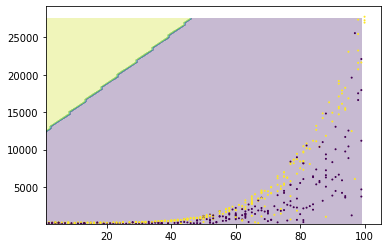

In [ ]:
#vamos incluir o Z utilizando o matplotlib
import matplotlib.pyplot as plt

#preenchendo as regiões onde o algoritmo acredita delimitar melhor os dados
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)


#Conclusão
O modelo utilizado "LinarSVC" delimita as regiões com base em uma reta, para esse caso, é melhor utilizar outro modelo, que não fique limitado a usar uma reta para limitar as regiões.
Iremos agora utilizar outro modelo de classificação

#Introduzindo o modelo SVC

In [ ]:
#modo alternativo ja implementado no sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# necessário para que o programa peqgue sempre os mesmos dados para treino, caso não seja especificado o "random_state",
# ele vai pegar porções diferentes para teste
SEED = 20

#visando separar proporcionalmente o treino_y e o teste_y
treino_x,teste_x,treino_y,teste_y = train_test_split(x,
                                                     y,
                                                     random_state = SEED,
                                                     test_size = 0.25,
                                                     stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x),len(teste_x)) )

modelo = SVC(gamma='auto')
modelo.fit(treino_x,treino_y)
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)

print("A acuracia foi de %.2f%%" % (acuracia*100))

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acuracia foi de 58.89%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


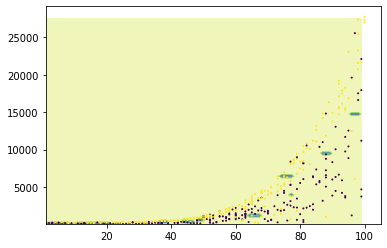

In [ ]:
#Visualizar como o algoritmo esta classificando
import matplotlib.pyplot as plt

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx.ravel()     # essa função é para juntar os termos repetidos, no caso aqui temos um 100 arrays iguais, vamos gerar 1, igual
yy.ravel()     # O mesmo vale para o yy
pontos = np.c_[xx.ravel(), yy.ravel()]
Z = modelo.predict(pontos)
Z.shape
Z = Z.reshape(xx.shape)
Z.shape
#preenchendo as regiões onde o algoritmo acredita delimitar melhor os dados
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)


Visando melhorar o algoritmo de classificação, vamos tratar os dados de treino_x e teste_x

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#aqui usamos o StandardScaler para melhorar a escala no eixo X e com isso adquirir um melhor resultado na classificacao
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


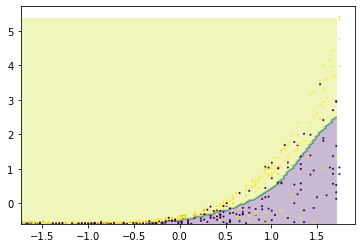

In [ ]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)
